<a href="https://colab.research.google.com/github/chinmaynaik-hub/automated-image-processing-project/blob/main/Python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive with Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import Image, ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Preventing errors with truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Function to remove corrupted images
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))

In [ ]:
# Setting up directories
basedir = "/content/drive/MyDrive/Colab_Notebooks/DATASET"
traindir = os.path.join(basedir, 'TRAIN')
validdir = os.path.join(basedir, 'TEST')


In [ ]:
# Removing corrupted images
classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
for cls in classes:
    removeCorruptedImages(os.path.join(traindir, cls))
    removeCorruptedImages(os.path.join(validdir, cls))


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.applications import Xception

In [ ]:
# Preparing Data Generators
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

bx = 16

train_generator = train_datagen.flow_from_directory(traindir, target_size = (300, 300), batch_size = bx, class_mode = 'categorical')
valid_generator = test_datagen.flow_from_directory(validdir, target_size = (300, 300), batch_size = bx, class_mode = 'categorical')


Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [ ]:
# Preparing Data Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator here

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

bx = 16
# verify the file path first by print the path
print(traindir)
print(validdir)

try:
    train_generator = train_datagen.flow_from_directory(
        traindir,
        target_size=(300, 300),
        batch_size=bx,
        class_mode='categorical'
    )
    valid_generator = test_datagen.flow_from_directory(
        validdir,
        target_size=(300, 300),
        batch_size=bx,
        class_mode='categorical'
    )
except FileNotFoundError:
    print(f"Error: Directory not found - Please check the path for 'traindir' and 'validdir'")
except OSError as e:
    print(f"An OS error occurred: {e}")

/content/drive/MyDrive/Colab_Notebooks/DATASET/TRAIN
/content/drive/MyDrive/Colab_Notebooks/DATASET/TEST
Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.applications import Xception

# Building the model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Define custom layers
x = base_model.output  # Get output tensor of base model
x = Flatten()(x)  # Flatten the output
x = Dense(128, activation='relu')(x)  # Add a dense layer with ReLU activation
x = Dropout(0.2)(x)  # Add a dropout layer for regularization
predictions = Dense(5, activation='softmax')(x)  # Add the final output layer with softmax activation

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)  # Define the Model using Functional API

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.0001, momentum = 0.9, nesterov = True),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2, from_logits = True),
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 300, 300, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 47,076,653 (179.58 MB)

 Trainable params: 47,022,125 (179.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
# Training the model
hist = model.fit(train_generator, validation_data = valid_generator, epochs = 15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 1/68 ━━━━━━━━━━━━━━━━━━━━ 57:38 52s/step - accuracy: 0.1250 - loss: 2.0336

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


68/68 ━━━━━━━━━━━━━━━━━━━━ 2231s 33s/step - accuracy: 0.4572 - loss: 1.4622 - val_accuracy: 0.8489 - val_loss: 0.9500
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2146s 32s/step - accuracy: 0.8193 - loss: 0.9896 - val_accuracy: 0.9085 - val_loss: 0.9027
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2206s 32s/step - accuracy: 0.8820 - loss: 0.9196 - val_accuracy: 0.9404 - val_loss: 0.8426
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2116s 31s/step - accuracy: 0.9302 - loss: 0.8573 - val_accuracy: 0.9426 - val_loss: 0.8253
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2193s 32s/step - accuracy: 0.9356 - loss: 0.8502 - val_accuracy: 0.9170 - val_loss: 0.8453
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2166s 32s/step - accuracy: 0.9321 - loss: 0.8504 - val_accuracy: 0.9553 - val_loss: 0.8067
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2133s 31s/step - accuracy: 0.9438 - loss: 0.8123 - val_accuracy: 0.9447 - val_loss: 0.8034
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2124s 31s/step - accuracy: 0.9678 - loss: 0.7845 - val_accuracy: 0.955

In [ ]:
# Evaluating the model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')


30/30 ━━━━━━━━━━━━━━━━━━━━ 216s 7s/step - accuracy: 0.9698 - loss: 0.7688
Validation loss: 0.7823682427406311
Validation accuracy: 0.9680851101875305


In [ ]:
# Saving the model
model.save("/content/drive/MyDrive/Colab_Notebooks/TRAINED_MODEL/Yoga_Pose_Classification_Model.h5")


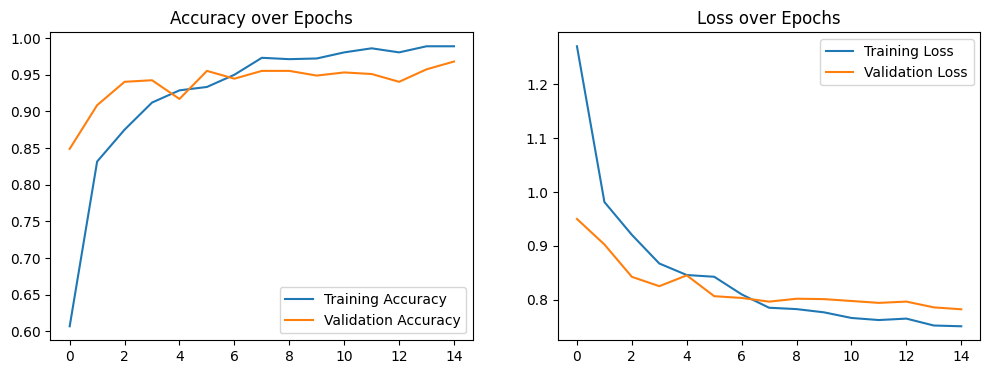

In [ ]:
# Visualizing training results
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/TRAINED_MODEL/Yoga_Pose_Classification_Model.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

img_path ='/content/drive/MyDrive/yoga6.jpeg'  # Replace with the actual path
img = image.load_img(img_path, target_size=(300, 300))  # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values

In [ ]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


In [ ]:
class_labels = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']  # Your class labels
predicted_class_label = class_labels[predicted_class_index]

In [ ]:
print(f"Predicted Yoga Pose: {predicted_class_label}")

Predicted Yoga Pose: tree


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model("/content/drive/MyDrive/Colab_Notebooks/TRAINED_MODEL/Yoga_Pose_Classification_Model.h5")
classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

def predict_pose(img):
    img = img.resize((300, 300))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    return {classes[i]: float(pred[0][i]) for i in range(len(classes))}

# Launch the Gradio app
gr.Interface(
    fn=predict_pose,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="🧘‍♀️ Yoga Pose Classifier",
    description="Upload a yoga pose image and see what pose it is!"
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://73ffb83ff20fa6bb0f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
